<a href="https://colab.research.google.com/github/itsvijay5111999/churn_rate_pred/blob/main/churn_rate_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required packages
!pip install -U scikit-learn xgboost imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.6 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier


In [ ]:
# Create synthetic classification data
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20,
                           n_informative=10, n_redundant=5,
                           n_clusters_per_class=2, weights=[0.85, 0.15],
                           flip_y=0.01, random_state=42)

# Convert to DataFrame
feature_names = [f'feature_{i}' for i in range(X.shape[1])]
X = pd.DataFrame(X, columns=feature_names)
y = pd.Series(y, name='target')

# View imbalance
y.value_counts()



,count
target,
0,843
1,157


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train_scaled, y_train)


In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_resampled, y_resampled)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:24:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb.predict(X_test_scaled)
y_proba = xgb.predict_proba(X_test_scaled)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.965
Precision: 0.9
Recall: 0.8709677419354839
F1 Score: 0.8852459016393442
ROC AUC: 0.9681236877266653
Confusion Matrix:
 [[166   3]
 [  4  27]]


# New Section

# New Section

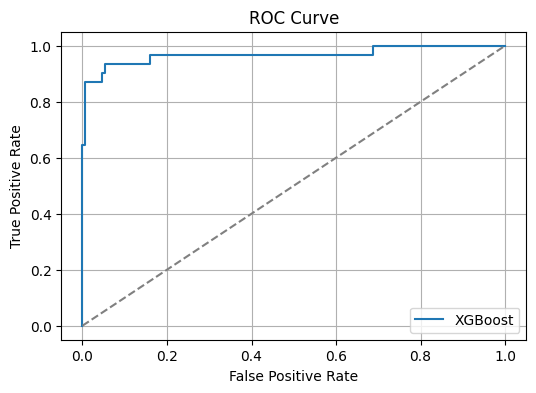

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='XGBoost')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [ ]:
thresholds = np.arange(0.1, 0.9, 0.05)
for t in thresholds:
    y_thresh = (y_proba >= t).astype(int)
    print(f"Threshold: {t:.2f} | Recall: {recall_score(y_test, y_thresh):.3f} | Precision: {precision_score(y_test, y_thresh):.3f} | F1: {f1_score(y_test, y_thresh):.3f}")


Threshold: 0.10 | Recall: 0.935 | Precision: 0.707 | F1: 0.806
Threshold: 0.15 | Recall: 0.935 | Precision: 0.725 | F1: 0.817
Threshold: 0.20 | Recall: 0.935 | Precision: 0.763 | F1: 0.841
Threshold: 0.25 | Recall: 0.903 | Precision: 0.757 | F1: 0.824
Threshold: 0.30 | Recall: 0.871 | Precision: 0.771 | F1: 0.818
Threshold: 0.35 | Recall: 0.871 | Precision: 0.844 | F1: 0.857
Threshold: 0.40 | Recall: 0.871 | Precision: 0.871 | F1: 0.871
Threshold: 0.45 | Recall: 0.871 | Precision: 0.900 | F1: 0.885
Threshold: 0.50 | Recall: 0.871 | Precision: 0.900 | F1: 0.885
Threshold: 0.55 | Recall: 0.871 | Precision: 0.900 | F1: 0.885
Threshold: 0.60 | Recall: 0.871 | Precision: 0.931 | F1: 0.900
Threshold: 0.65 | Recall: 0.871 | Precision: 0.931 | F1: 0.900
Threshold: 0.70 | Recall: 0.871 | Precision: 0.964 | F1: 0.915
Threshold: 0.75 | Recall: 0.871 | Precision: 0.964 | F1: 0.915
Threshold: 0.80 | Recall: 0.839 | Precision: 0.963 | F1: 0.897
Threshold: 0.85 | Recall: 0.774 | Precision: 0.960 | F1